In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')


print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \

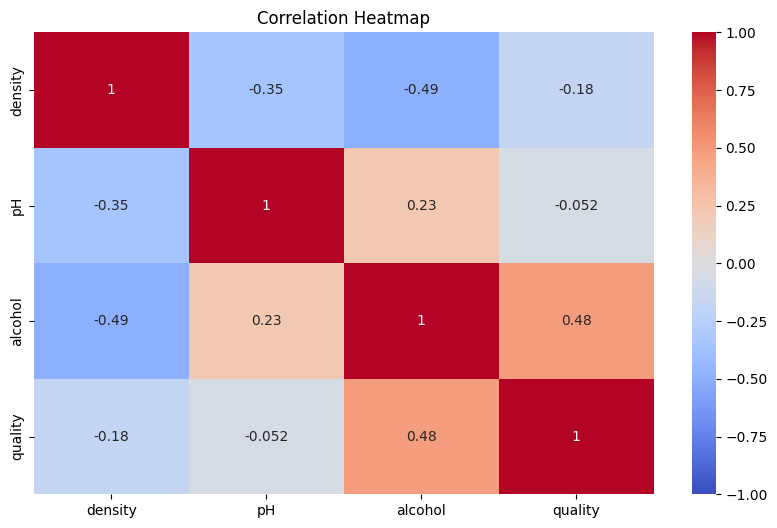

In [2]:

correlation_matrix = df[['density', 'pH', 'alcohol', 'quality']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


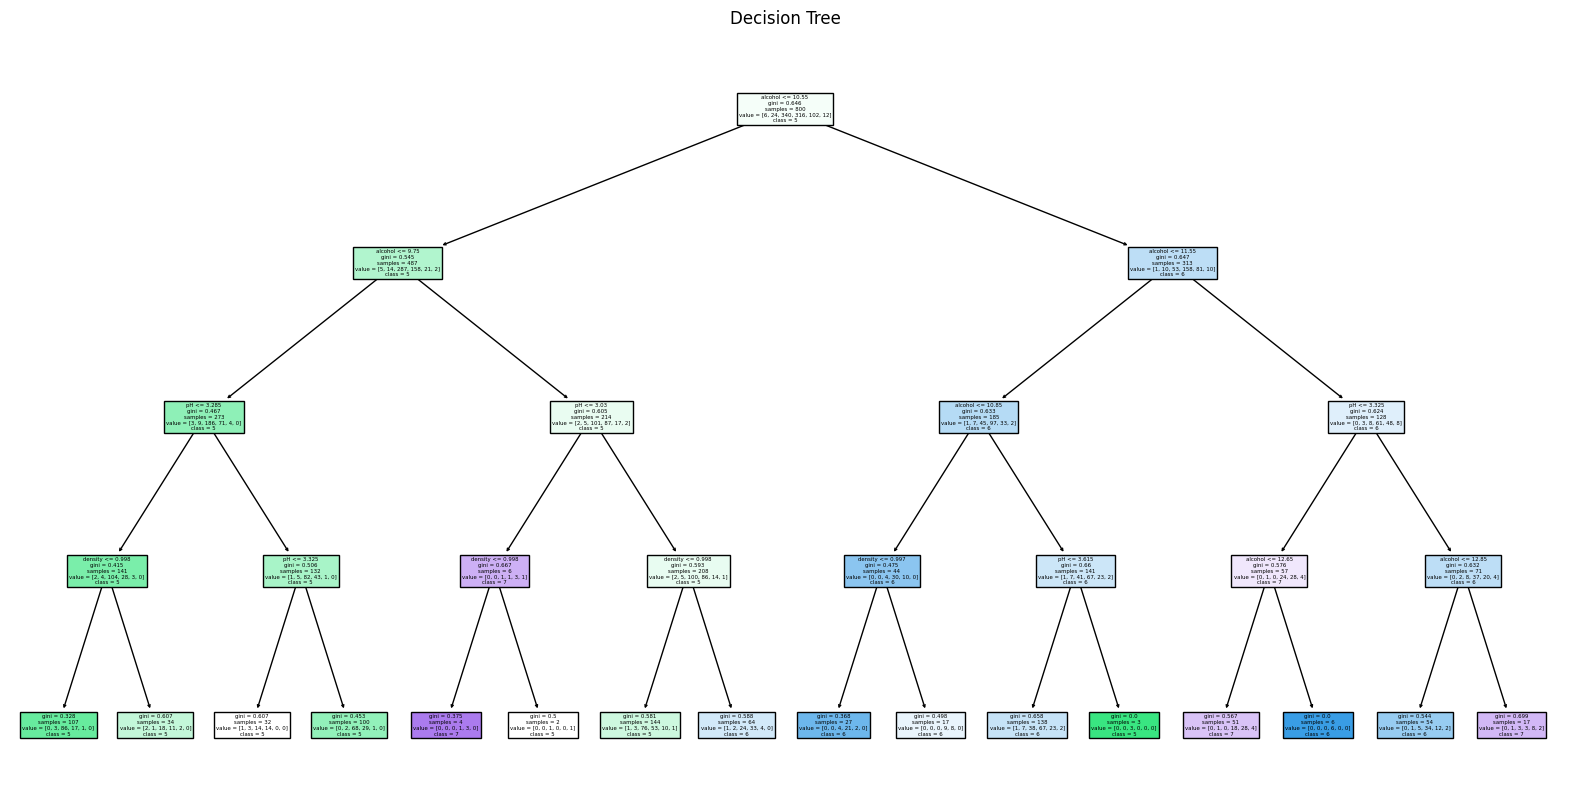

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


X = df[['density', 'pH', 'alcohol']]
y = df['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=['density', 'pH', 'alcohol'], class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.title('Decision Tree')
plt.show()


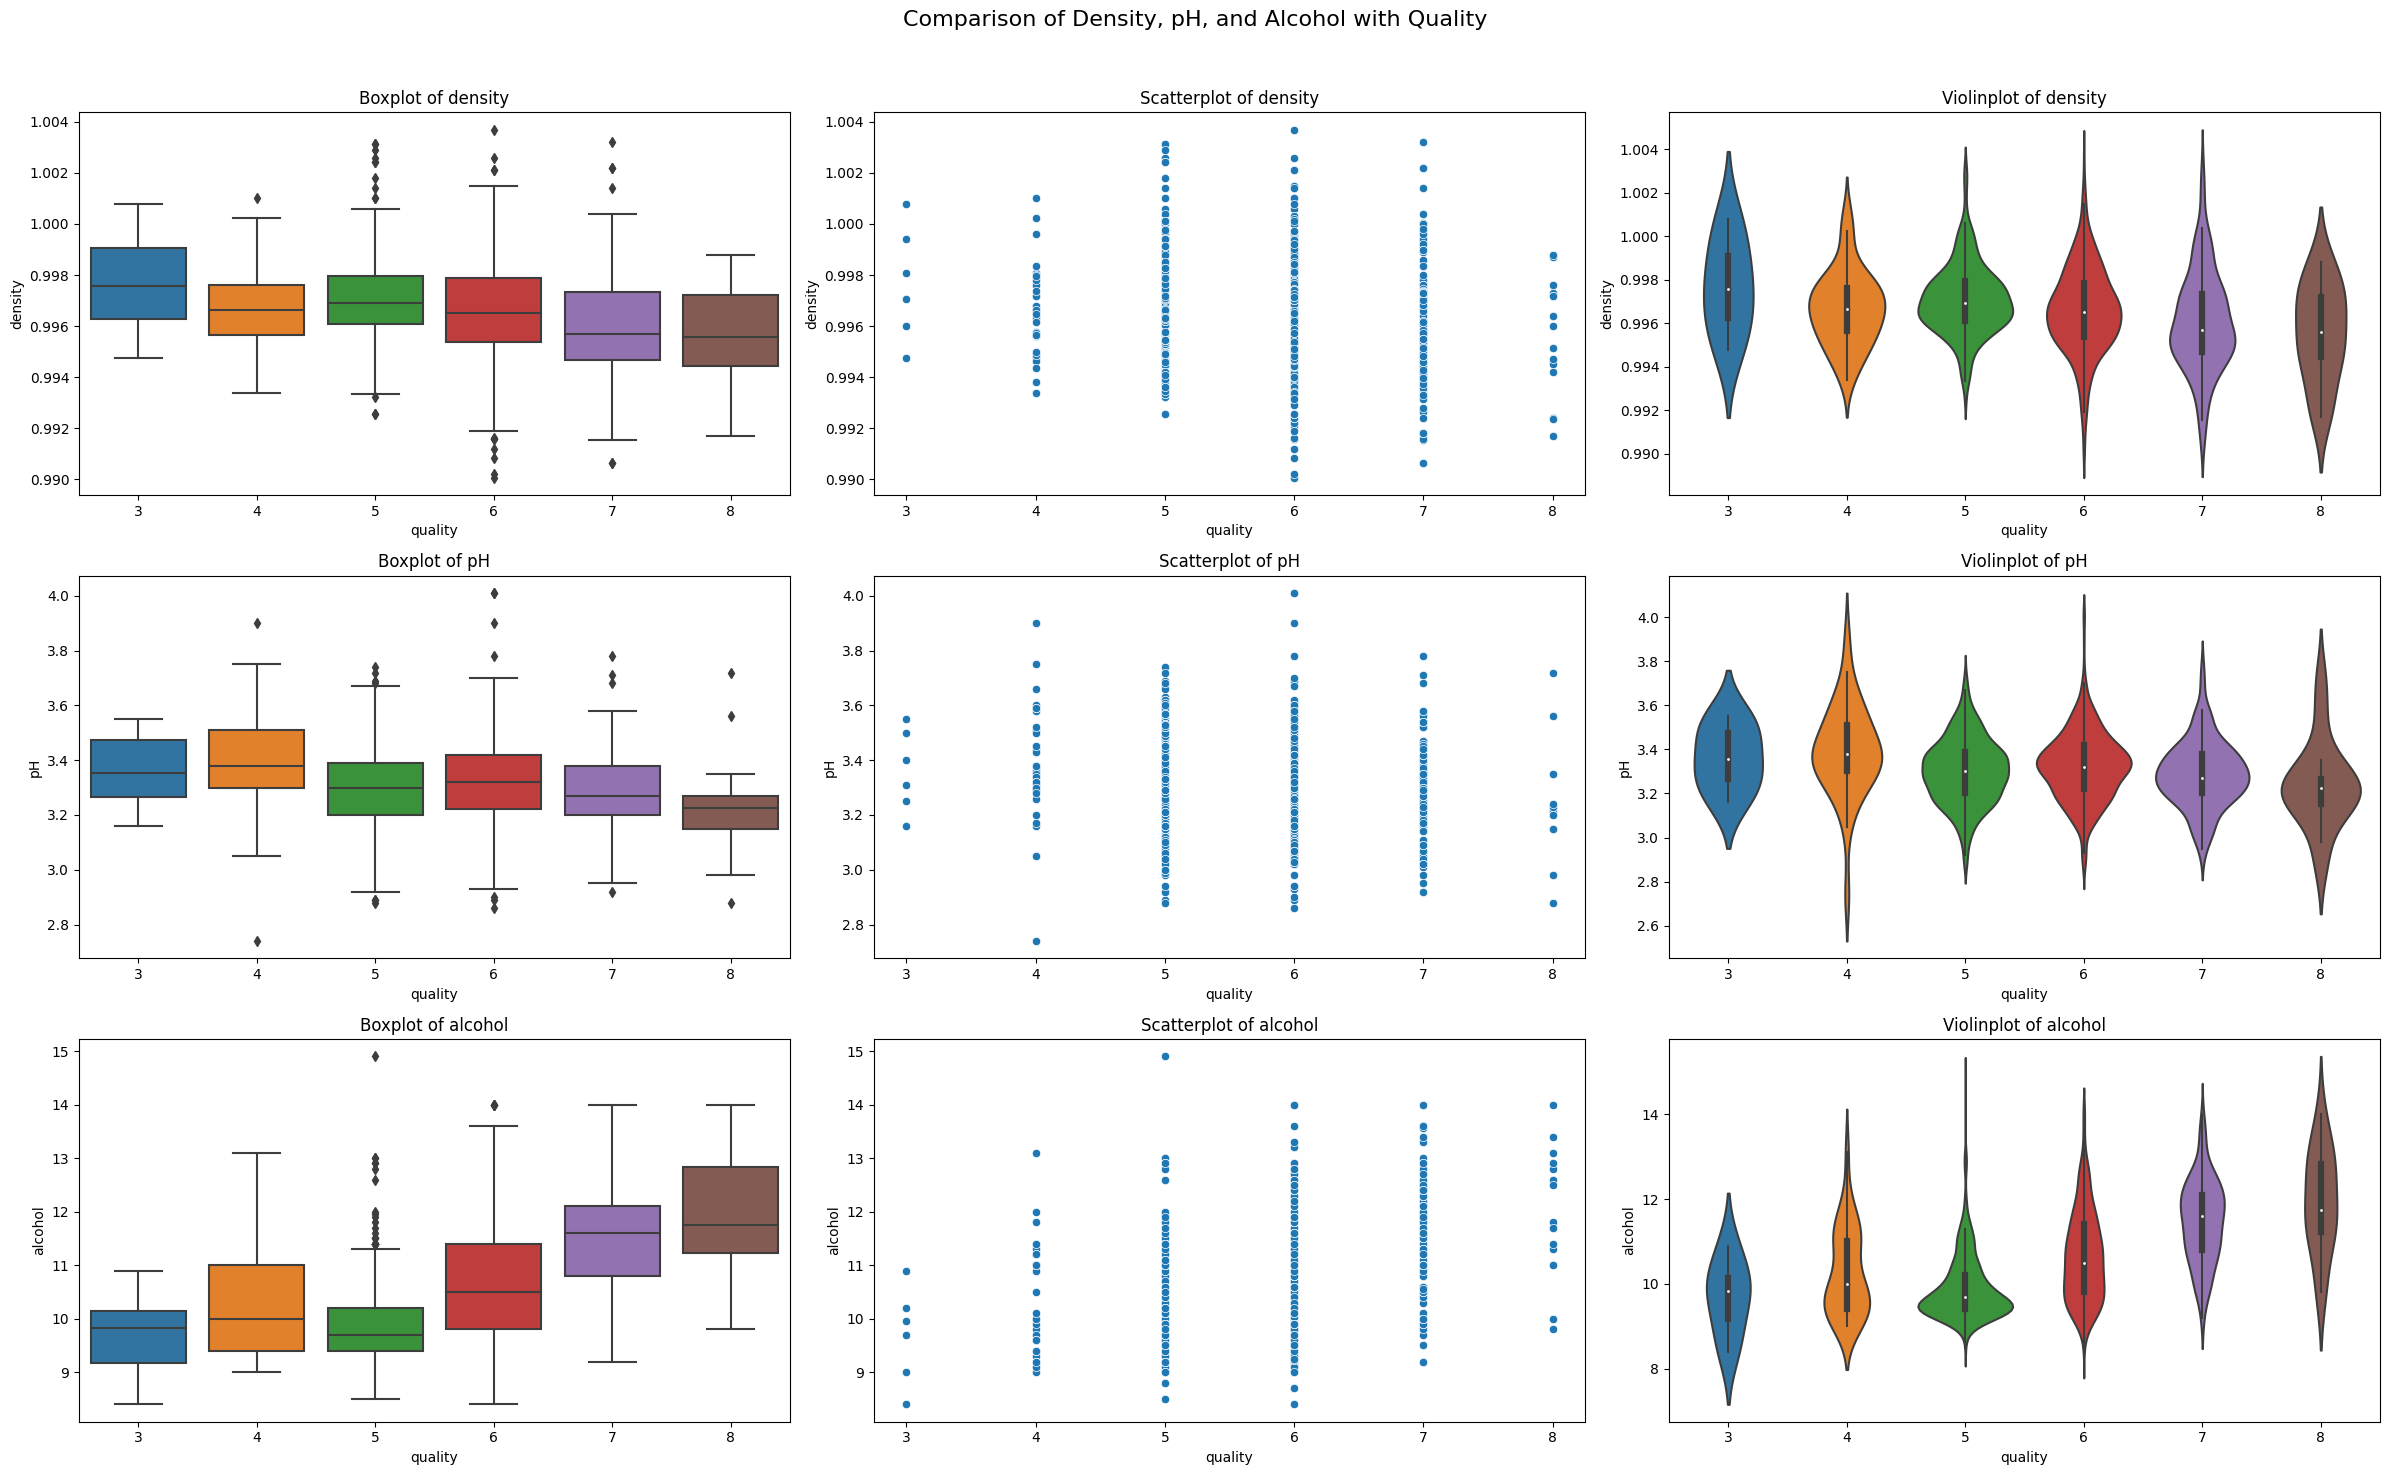

In [4]:


fig, axes = plt.subplots(3, 3, figsize=(24, 15))
fig.suptitle('Comparison of Density, pH, and Alcohol with Quality', fontsize=16)


features = ['density', 'pH', 'alcohol']
plot_types = ['boxplot', 'scatterplot', 'violinplot']


for i, feature in enumerate(features):                         
    # Boxplot
    sns.boxplot(x='quality', y=feature, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {feature}')
    
    # Scatterplot
    sns.scatterplot(x='quality', y=feature, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'Scatterplot of {feature}')
    
    # Violinplot
    sns.violinplot(x='quality', y=feature, data=df, ax=axes[i, 2])
    axes[i, 2].set_title(f'Violinplot of {feature}')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [5]:
# fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# fig.suptitle('Stripplots of Density, pH, and Alcohol with Quality', fontsize=16)

# features = ['density', 'pH', 'alcohol']

# for i, feature in enumerate(features):
#     sns.stripplot(x='quality', y=feature, data=df, ax=axes[i], jitter=True, alpha=0.6)
#     axes[i].set_title(f'Stripplot of {feature}')
#     axes[i].set_xlabel('Quality')
#     axes[i].set_ylabel(feature)


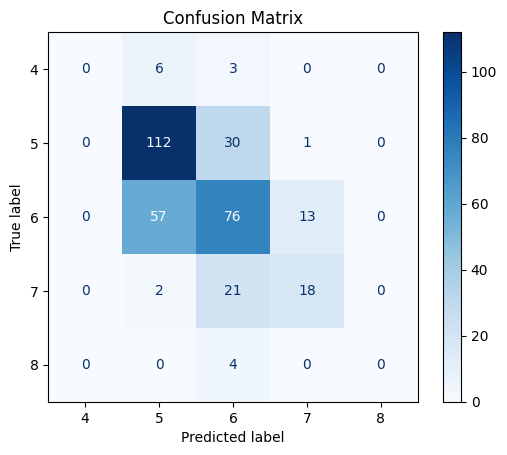

Mean Squared Error: 0.4868804664723032


In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix, mean_squared_error, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

all_labels = np.unique(np.concatenate((y_test, y_pred)))


conf_matrix = confusion_matrix(y_test, y_pred, labels=all_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=all_labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_rf_pred)
print(f'Random Forest Mean Squared Error: {rf_mse}')


Random Forest Mean Squared Error: 0.5481049562682215


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lin_reg = LinearRegression()


lin_reg.fit(X_train, y_train)


y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)


print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)


mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Train Mean Squared Error: {mse_train}')
print(f'Test Mean Squared Error: {mse_test}')
print(f'Train R^2 Score: {r2_train}')
print(f'Test R^2 Score: {r2_test}')


Coefficients: [13.490142   -0.83194875  0.40768379]
Intercept: -9.292635097375266
Train Mean Squared Error: 0.5091898014158981
Test Mean Squared Error: 0.4050488794378137
Train R^2 Score: 0.24842833739350845
Test R^2 Score: 0.30335074532221307


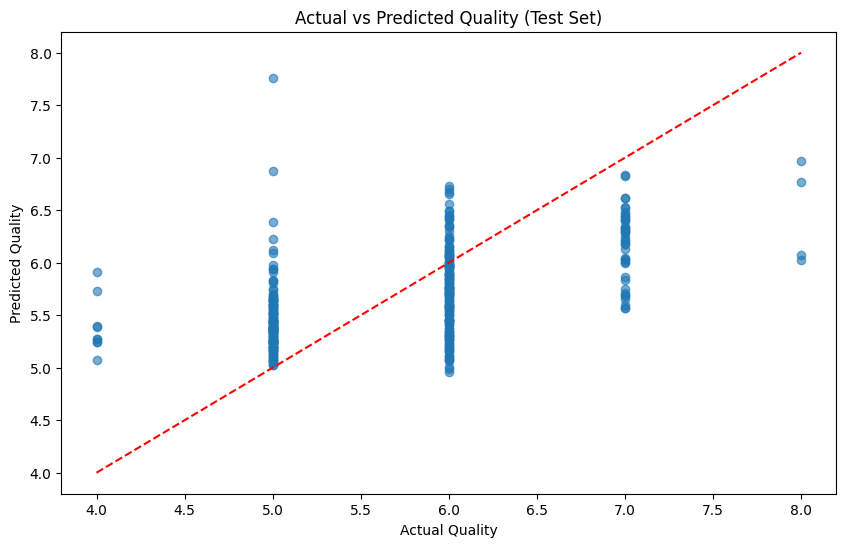

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality (Test Set)')
plt.show()
